In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

train_on_gpu=torch.cuda.is_available()

Load the Data

In [14]:
from torchvision import datasets
from torchvision.transforms import transforms
from torch.utils.data.sampler import SubsetRandomSampler

number_of_workers = 0
batch_size= 10
valid_size= 0.2

#  Converting Data into a Normalized Tensor format
# 将数据转换为规范化张量格式
transform = transforms.Compose([
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, 0.5, 0.5), std= (0.5, 0.5, 0.5))
])

In [15]:
# Downloading training and testing Datasets
# 下载训练和测试数据集
train_data= datasets.CIFAR10('data', train= True,download= True, transform = transform)
test_data = datasets.CIFAR10('data', train = False,download = True, transform= transform)
print('训练集长度：',len(train_data))
print('测试集长度：',len(test_data))

Files already downloaded and verified
Files already downloaded and verified
训练集长度： 50000
测试集长度： 10000


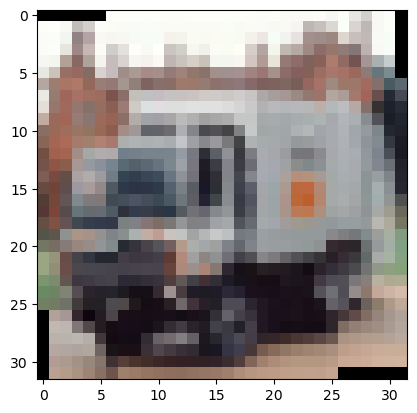

In [16]:
# 显示一张图片
feature, label = test_data[11]
data = feature*0.5+0.5
img = data.numpy()
img = np.transpose(img,(1,2,0))
plt.imshow(img)

In [17]:
# Obtaining training Indices that we are going to use for Validation Set
# 获取我们将用于验证集的训练索引
num_train= len(train_data) # 50000个
indices = list(range(num_train))
np.random.shuffle(indices)
# 打乱索引顺序
split = int(np.floor(valid_size * num_train)) # 10000个
# 划分训练和验证：训练40000，验证10000
train_idx, valid_idx = indices[split:] , indices[:split]


In [18]:
# Defining samplers for training and validation Bathces
# 定义用于培训和验证的采样器
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Preparing Data Loader for all three sets (combining datasets and samplers)
# 为所有三个集合准备数据加载器(结合数据集和采样器)
# 主要作用是将原始数据集转换为模型可以接受的格式
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size ,
                                           sampler= train_sampler , num_workers = number_of_workers)
test_loader= torch.utils.data.DataLoader(test_data, batch_size= batch_size, 
                                         num_workers= number_of_workers)
print('train_loader长度：',len(train_loader))
print('test_loader长度：',len(test_loader))

train_loader长度： 4000
test_loader长度： 1000


In [19]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [20]:
import torch.nn as nn
import torch.nn.functional as F # 包含一些非线性函数，如激活函数等

# define the CNN architecture 定义 CNN 架构
class Cnn(nn.Module): 
    def __init__(self): 
        super(Cnn, self).__init__() 
            
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(3, 6, 5 , padding=0, stride= 1) 
        self.conv2 = nn.Conv2d(6, 16, 5, padding=0, stride= 1) 
        # self.conv1 = nn.Conv2d(3, 6, 5 , padding=0, stride= 1) 
        # self.conv2 = nn.Conv2d(6, 16, 5, padding=0, stride= 1) 
        
        # self.fc1 = nn.Linear(16*5*5, 120)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x= self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x= F.relu(self.fc1(x)) 
        x= F.relu(self.fc2(x)) 
        x= self.fc3(x) 
        return x

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
learning_rate= 0.0001
epoches = 20
model= Cnn().to(device)   
print(model)
lossFun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
    

Cnn(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


epoch_num:1,mean loss：1.067731,mean acc：62.40%
epoch_num:2,mean loss：1.055286,mean acc：62.88%
epoch_num:3,mean loss：1.046529,mean acc：63.09%
epoch_num:4,mean loss：1.038270,mean acc：63.51%
epoch_num:5,mean loss：1.025995,mean acc：63.93%
epoch_num:6,mean loss：1.013018,mean acc：64.35%
epoch_num:7,mean loss：1.009118,mean acc：64.74%
epoch_num:8,mean loss：0.996993,mean acc：64.93%
epoch_num:9,mean loss：0.989428,mean acc：65.19%
epoch_num:10,mean loss：0.981906,mean acc：65.51%
epoch_num:11,mean loss：0.974514,mean acc：65.95%
epoch_num:12,mean loss：0.966286,mean acc：66.07%
epoch_num:13,mean loss：0.959565,mean acc：66.19%
epoch_num:14,mean loss：0.952748,mean acc：66.46%
epoch_num:15,mean loss：0.945717,mean acc：66.91%
epoch_num:16,mean loss：0.939624,mean acc：67.16%
epoch_num:17,mean loss：0.928273,mean acc：67.61%
epoch_num:18,mean loss：0.920516,mean acc：67.81%
epoch_num:19,mean loss：0.916344,mean acc：67.97%
epoch_num:20,mean loss：0.911543,mean acc：68.10%


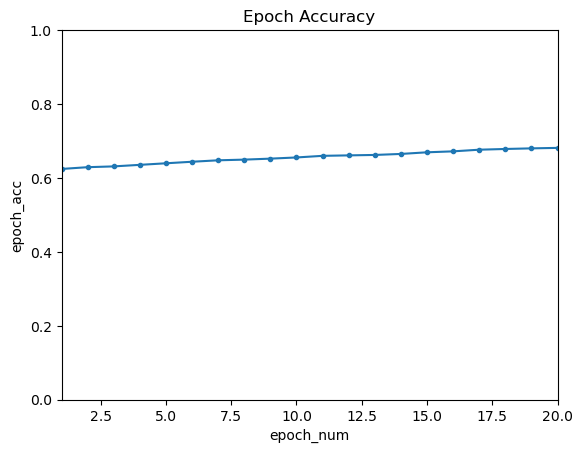

【epoches:20,Model_loss:0.9819702008185907,Model_acc：0.6553750000000014】
---------------------------


In [40]:
losses =[]
Model_acc=0
Model_loss=0
# 创建一个列表来存储横坐标和纵坐标数据
epoch_nums = []
epoch_accs = []

for epoch in range (epoches):
    running_loss=0.0
    running_acc = 0.0
    epoch_loss=0.0
    epoch_acc =0.0
    
    for i, data in enumerate(train_loader):
        features = data[0].to(device)
        lables = data[1].to(device)
        preds = model(features)
        loss = lossFun(preds,lables)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()
        
        total_num = lables.shape[0]
        _, predicts = torch.max(preds.data, 1)    
        correct = (predicts == lables).sum().item()
        accuracy = correct / total_num
        running_acc += accuracy
        
        if i % 1000 == 999:
            # print(f'当前训练轮次:{epoch+1},当前批次：{i+1},平均损失值：{(running_loss/1000):.6f},平均准确率：{(running_acc/1000):.2%}')
            epoch_loss += running_loss/1000
            epoch_acc += running_acc/1000
            
            running_loss = 0.0
            running_acc = 0.0
            
        losses.append(loss.item())
    epoch_loss = epoch_loss/4
    epoch_acc= epoch_acc/4    
    print(f'epoch_num:{epoch+1},mean loss：{(epoch_loss):.6f},mean acc：{(epoch_acc):.2%}')
    epoch_nums.append(epoch+1)
    epoch_accs.append(epoch_acc)
    Model_loss += epoch_loss
    Model_acc += epoch_acc
    epoch_loss=0.0        
    epoch_acc=0.0 
# 绘制折线图
plt.plot(epoch_nums, epoch_accs, marker='.')
plt.xlabel('epoch_num')
plt.ylabel('epoch_acc')
plt.title('Epoch Accuracy')
plt.xlim(1, epoches) 
plt.ylim(0, 1)
plt.show()

Model_loss = Model_loss/(epoches)
Model_acc= Model_acc/(epoches)
print(f'【epoches:{epoches},Model_loss:{Model_loss},Model_acc：{Model_acc}】')
print('---------------------------')

In [41]:
model.cpu()
with torch.no_grad():
    num_correct=0
    num_sample=0
    for features, lables in test_loader:
        preds = model(features)
        _, indexes = torch.max(preds, axis=1)
        num_correct += (indexes == lables).sum().item()
        num_sample += len(lables)
    print(f' Current Model acc：{(num_correct/num_sample):.2%}')


 Current Model acc：64.67%


In [42]:
model.eval()  # 将模型设置为评估模式
num_correct = 0  
num_sample = 0  

with torch.no_grad():  # 在不计算梯度的情况下进行推理
    for features, labels in test_loader:  # 遍历测试数据集中的每个批次
        features = features.to(device)  
        labels = labels.to(device) 

        preds = model(features)  
        _, indexes = torch.max(preds, axis=1)  

        num_correct += (indexes == labels).sum().item() 
        num_sample += len(labels)  
accuracy = num_correct / num_sample  
print(f'Current Model Accuracy: {accuracy:.2%}')

Current Model Accuracy: 64.43%


# Find the best learning rate and epoch


In [55]:
learning_rates = [0.01,0.005,0.001,0.0005,0.0001]
epoches= [5,10,20,30,50]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tj = []
for i, lrate in enumerate(learning_rates):
    epochNum = epoches[i]
    model = Cnn().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr= lrate)

    train_loss=[]
    train_acc=[]
    for epoch in range(epochNum):
        for j, data in enumerate(train_loader):
            features = data[0].to(device)
            labels = data[1].to(device)
            outputs = model(features)
            loss = lossFun(outputs,labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss.append(loss.item())
            _, predicts = torch.max(outputs, 1)    
            correct = (predicts == labels).sum().item()
            total = labels.shape[0]
            train_acc.append(correct/total)
            
        loss_mean=np.mean(train_loss)
        acc_mean=np.mean(train_acc)
        print(f'lr={lrate},epoch_num={epochNum},epoch={epoch},loss={loss_mean},acc={acc_mean:.2%}')

    model.cpu()
    with torch.no_grad():
        num_correct=0
        num_sample=0
        for features, lables in test_loader:
            pred = model(features)
            _, indexes = torch.max(pred, axis=1)
            num_correct += (indexes == lables).sum().item()
            num_sample += len(lables)
        print(f'Model acc：{( num_correct/num_sample):.2%}')
        

        result = {"lr": lrate, "epoch_num": epochNum, "acc": num_correct/num_sample}
        tj.append(result)
    print(tj)
    print('------------------------------------')

lr=0.01,epoch_num=5,epoch=0,loss=2.3048489688038827,acc=9.95%
lr=0.01,epoch_num=5,epoch=1,loss=2.304829020410776,acc=9.94%
lr=0.01,epoch_num=5,epoch=2,loss=2.3049650080601376,acc=9.93%
lr=0.01,epoch_num=5,epoch=3,loss=2.304960005491972,acc=9.91%
lr=0.01,epoch_num=5,epoch=4,loss=2.3049966575980187,acc=9.87%
Model acc：10.00%
[{'lr': 0.01, 'epoch_num': 5, 'acc': 0.1}]
------------------------------------
lr=0.005,epoch_num=10,epoch=0,loss=1.922355063676834,acc=25.88%
lr=0.005,epoch_num=10,epoch=1,loss=1.8397572458982467,acc=29.98%
lr=0.005,epoch_num=10,epoch=2,loss=1.79755338793993,acc=31.90%
lr=0.005,epoch_num=10,epoch=3,loss=1.7643729874752463,acc=33.60%
lr=0.005,epoch_num=10,epoch=4,loss=1.7362567661195993,acc=35.07%
lr=0.005,epoch_num=10,epoch=5,loss=1.7127153719440102,acc=36.23%
lr=0.005,epoch_num=10,epoch=6,loss=1.6946628254822322,acc=37.15%
lr=0.005,epoch_num=10,epoch=7,loss=1.6800474345693366,acc=37.88%
lr=0.005,epoch_num=10,epoch=8,loss=1.667489167512291,acc=38.54%
lr=0.005,epoch

Model acc：64.42%
[{'lr': 0.01, 'epoch_num': 5, 'acc': 0.1}, {'lr': 0.005, 'epoch_num': 10, 'acc': 0.453}, {'lr': 0.001, 'epoch_num': 20, 'acc': 0.6394}, {'lr': 0.0005, 'epoch_num': 30, 'acc': 0.652}, {'lr': 0.0001, 'epoch_num': 50, 'acc': 0.6442}]
------------------------------------
